In [258]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')

In [259]:
data=pd.read_csv('pulsar_stars.csv')

In [260]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [261]:
data.shape

(17898, 9)

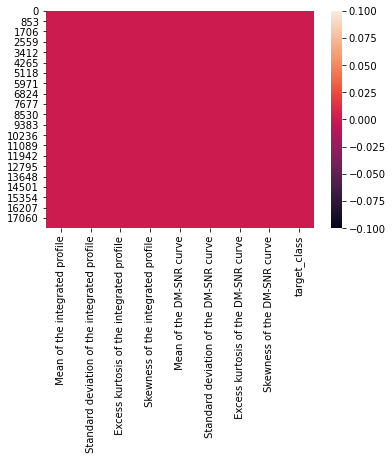

In [262]:
sns.heatmap(data.isnull())

In [263]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [264]:
data.columns=['mean_profile','std_profile','kurtosis_profile',
             'skewness_profile','mean_dmsnr_curve','std_dmsnr_curve',
              'kurtosis_dmsnr_cirve','skewness_dmsnr_curve','target_class'
             ]

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_profile          17898 non-null  float64
 1   std_profile           17898 non-null  float64
 2   kurtosis_profile      17898 non-null  float64
 3   skewness_profile      17898 non-null  float64
 4   mean_dmsnr_curve      17898 non-null  float64
 5   std_dmsnr_curve       17898 non-null  float64
 6   kurtosis_dmsnr_cirve  17898 non-null  float64
 7   skewness_dmsnr_curve  17898 non-null  float64
 8   target_class          17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [266]:
data.isnull().sum()

mean_profile            0
std_profile             0
kurtosis_profile        0
skewness_profile        0
mean_dmsnr_curve        0
std_dmsnr_curve         0
kurtosis_dmsnr_cirve    0
skewness_dmsnr_curve    0
target_class            0
dtype: int64

In [267]:
data.describe()[1:]

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_cirve,skewness_dmsnr_curve,target_class
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


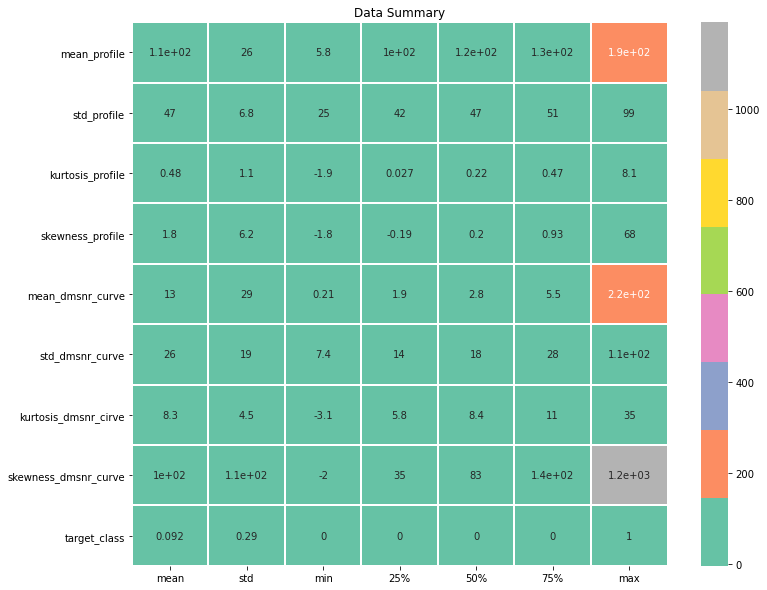

In [268]:
pl.figure(figsize=(12,10))
pl.title("Data Summary")

sns.heatmap(data.describe()[1:].T,annot=True,linecolor='w',
            linewidths=1,cmap='Set2'
           )
pl.show()

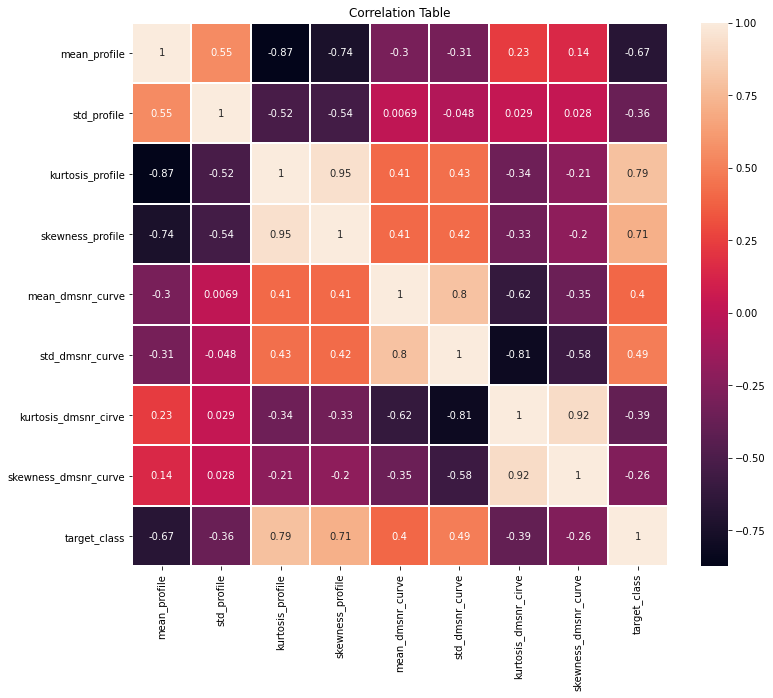

In [269]:
pl.figure(figsize=(12,10))
pl.title('Correlation Table')
sns.heatmap(data.corr(),annot=True,linewidths=1)
pl.show()

,target,counts
0,0,16259
1,1,1639


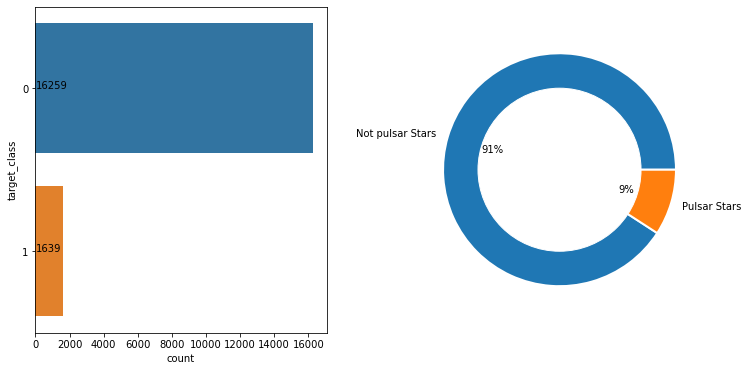

In [270]:
pl.figure(figsize=(12,6))
pl.subplot(121)
temp.columns=['target','counts']
ax=sns.countplot(y=data['target_class'])
for i,j in enumerate(temp['counts']):
    ax.text(0.1,i,j)

tmp=data['target_class'].value_counts().reset_index()
tmp.columns=['target','counts']
    
pl.subplot(122)
pl.pie(tmp['counts'],labels=['Not pulsar Stars','Pulsar Stars'],
      autopct="%1.0f%%",wedgeprops={'linewidth':2,'edgecolor':'w'})
mycirc=pl.Circle((0,0),.7,color='white')
pl.gca().add_artist(mycirc)
pl.subplots_adjust(wspace=.3)
tmp

In [271]:
a=data[data['target_class']==0].mean().reset_index()
b=data[data['target_class']==1].mean().reset_index()

a.columns=['type','mean']
b.columns=['type','mean']
c=pd.merge(a,b,on='type')
c=c.T
c.columns=c.iloc[0,:]
c

type,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_cirve,skewness_dmsnr_curve,target_class
type,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_cirve,skewness_dmsnr_curve,target_class
mean_x,116.563,47.3397,0.21044,0.380844,8.86326,23.288,8.86267,113.62,0
mean_y,56.6906,38.7106,3.13066,15.5536,49.826,56.469,2.75707,17.9317,1


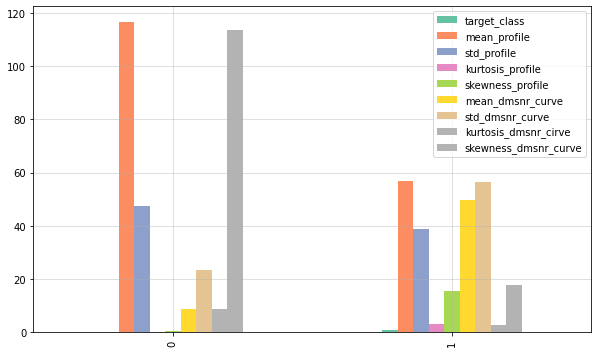

In [272]:
compare_mean = data.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                                        'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_cirve',
                                        'skewness_dmsnr_curve']].mean().reset_index()
compare_mean.plot.bar(figsize=(10,6),cmap='Set2')
pl.grid(alpha=0.5)
pl.show()

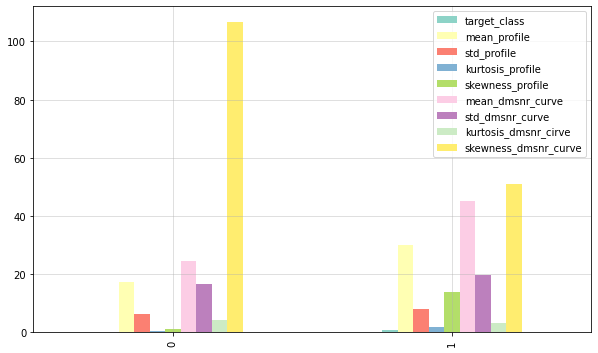

In [273]:
compare_std = data.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                                        'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_cirve',
                                        'skewness_dmsnr_curve']].std().reset_index()
compare_std.plot.bar(figsize=(10,6),cmap='Set3')
pl.grid(alpha=0.5)
pl.show()


In [274]:
compare_mean

,target_class,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_cirve,skewness_dmsnr_curve
0,0,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344
1,1,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728


In [275]:
compare_std

,target_class,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_cirve,skewness_dmsnr_curve
0,0,17.475932,6.182929,0.334606,1.027791,24.411409,16.651426,4.238626,106.721930
1,1,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263


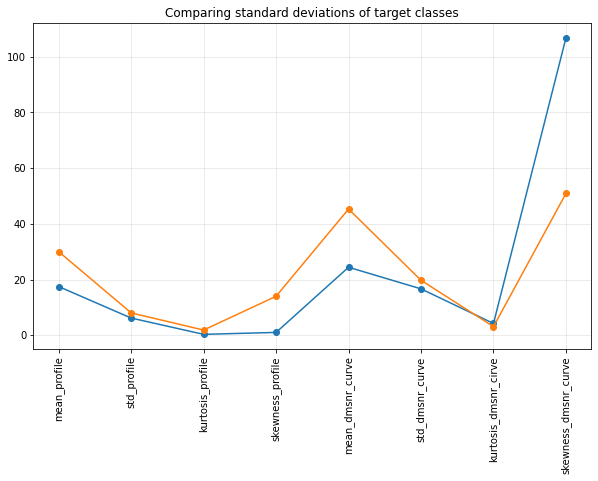

In [276]:
pl.figure(figsize=(10,6))
pl.title('Comparing standard deviations of target classes')
pl.plot(range(8),compare_std.iloc[0,1:],marker='o')
pl.plot(range(8),compare_std.iloc[1,1:],marker='o')
pl.xticks(range(8),compare_std.columns[1:],rotation=90)
pl.grid(alpha=0.3)
pl.show()

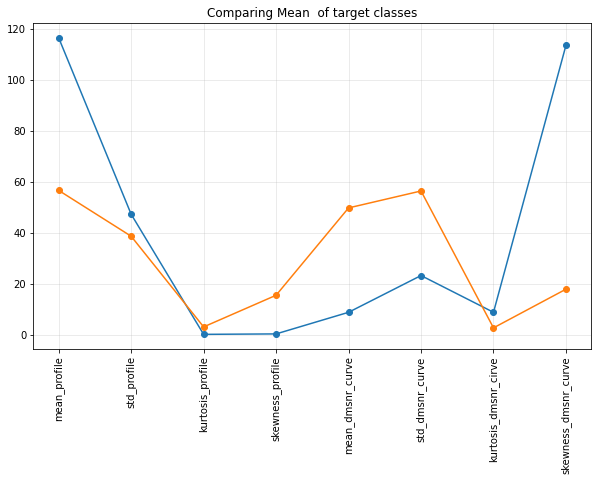

In [277]:
pl.figure(figsize=(10,6))
pl.title('Comparing Mean  of target classes')
pl.plot(range(8),compare_mean.iloc[0,1:],marker='o')
pl.plot(range(8),compare_mean.iloc[1,1:],marker='o')
pl.xticks(range(8),compare_mean.columns[1:],rotation=90)
pl.grid(alpha=0.3)
pl.show()

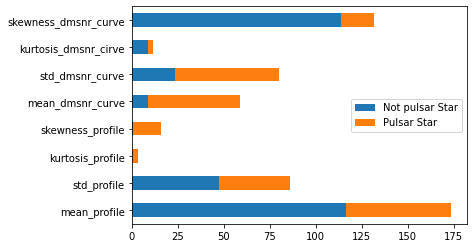

In [278]:
compare_mean.T.iloc[1:,:].plot(kind='barh',stacked=True)
pl.legend(['Not pulsar Star','Pulsar Star'])

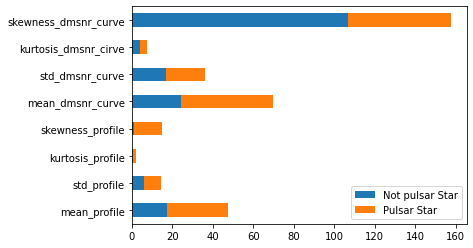

In [279]:
compare_std.T.iloc[1:,:].plot(kind='barh',stacked=True)
pl.legend(['Not pulsar Star','Pulsar Star'])

In [280]:
compare_mean=compare_mean.T.reset_index()
compare_mean.columns=['features','not_star','star']
compare_std=compare_std.T.reset_index()
compare_std.columns=['features','not_star','star']

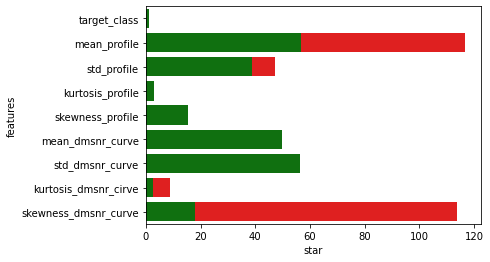

In [285]:
sns.barplot(y='features',x='not_star',data=compare_mean,color='r')
sns.barplot(y='features',x='star',data=compare_mean,color='g')